In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import clear_output, Video

matplotlib.rcParams["figure.figsize"] = (10, 8)

## Wave in Vaccum

In [2]:
# Add zpic library to path
import sys

sys.path.append("../lib")

# get ZPIC 2D
import em1d as zpic
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import clear_output, Video

matplotlib.rcParams["figure.figsize"] = (10, 8)

In [2]:
# Time step
dt = 0.01

# Number of cells
nx = 64

# Simulation box size
box = 6.4
def E(ix, dx):
    x = (ix+0.5)*dx
    return [0,0,np.sin(x)**2]
sim = zpic.Simulation(nx, box, dt)
init = zpic.InitialField(E_type = 'custom', E_custom = E)
sim.emf.init_fld( init )

In [3]:
# sim.set_moving_window()
iterations = int(10/dt)
Ezs = np.zeros((iterations, nx))
Bys = np.zeros((iterations, nx))
for i in range(iterations):
    print(f"{i+1} of {iterations}", end="\r")
    sim.iter()
    Ezs[i] = sim.emf.Ez
    Bys[i] = sim.emf.By


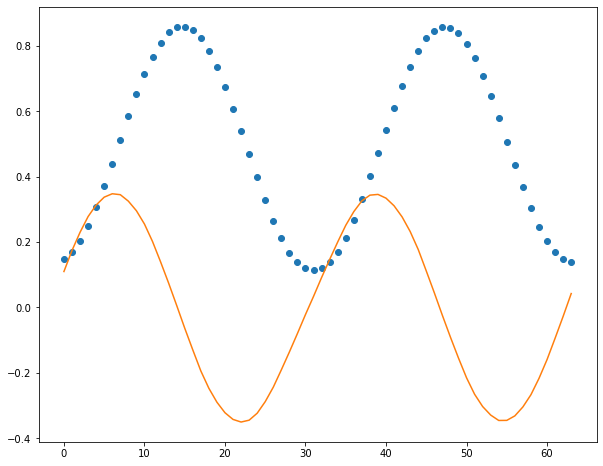

In [4]:
plt.plot(sim.emf.Ez, "o")
plt.plot(sim.emf.By)

In [18]:
# Creating the Figure and Axes
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

# Setting title and axes names
plt.title("Wave in Vaccum", fontdict={"fontsize": 18})
plt.xlabel("Node", fontdict={"fontsize": 18})
plt.ylabel("Amplitude", fontdict={"fontsize": 18})
plt.xlim(0, 64)
plt.ylim(-1.1, 1.1)

# Lines which are neede to animate
N = 2
lines = [plt.plot([], [])[0] for _ in range(N)]

# The init function
def init():
    # init lines
    for line in lines:
        line.set_data([], [])
    return lines


# Needed for adding legends
legend = plt.legend()

# The Animate function
def animate(i):
    values = np.array([Ezs[i], Bys[i]])

    # Plot the solution and the legends
    for j, line in enumerate(lines):
        line.set_data(range(len(values[j])), values[j])
        if j == 0:
            line.set_label(fr"$E_z$ at t={(i+1)*dt:.2f}")
        else:
            line.set_label(fr"$H_x$ at t={(i+1)*dt:.2f}")
    legend = plt.legend(loc="upper right")
    if (i + 1) % 50 == 0:
        print("Time", i + 1, end="\r")
        # clear_output(wait=True)
    return lines + [legend]


# The animation
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=np.arange(0, iterations), interval=40, blit=True
)

# Saving the Animation
anim.save("wave.mp4", writer="ffmpeg")
plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [19]:
Video("wave.mp4")

## Laser in 1D

In [19]:
# Add zpic library to path
import sys
sys.path.append("../lib")

import em1d
import numpy as np

# Time step
dt = 0.019

# Number of cells
nx  = 1000

# Simulation box size
box = 20.0

# Initialize simulation
sim = em1d.Simulation( nx, box, dt )

# Add laser pulse
sim.add_laser( em1d.Laser( start = 15.0, fwhm = 4.0, a0 = 1.0, omega0 = 10.0,
               polarization = np.pi/2 ))

In [20]:
# Set moving window
# sim.set_moving_window()

iterations = int(50/dt)
Ezs = np.zeros((iterations, nx))
Bys = np.zeros((iterations, nx))
for i in range(iterations):
    print(f"{i+1} of {iterations}", end="\r")
    sim.iter()
    Ezs[i] = sim.emf.Ez
    Bys[i] = sim.emf.By


In [21]:
Ezs.max(), Bys.max()

(11.77448844909668, 11.90538215637207)

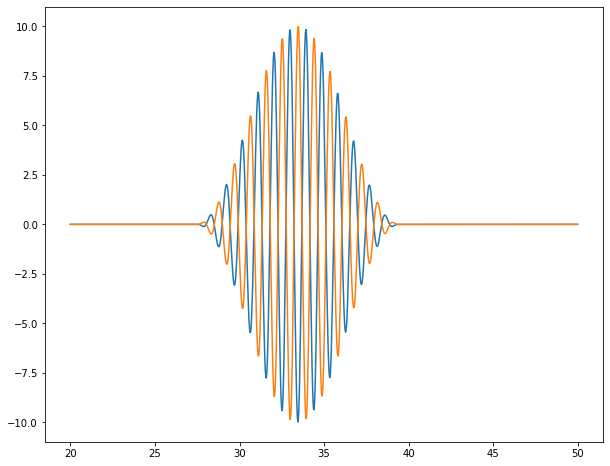

In [22]:
xmin = sim.dx/2 + sim.t
xmax = sim.box + (sim.n_move - 0.5) * sim.dx
plt.plot(np.linspace(xmin, xmax, num = sim.nx), Ezs[0], label = "$E_z$ field" )
plt.plot(np.linspace(xmin, xmax, num = sim.nx), Bys[0], label = "$B_y$ field" )

In [10]:
# Creating the Figure and Axes
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
xmin = sim.dx/2 + sim.t
xmax = sim.box + (sim.n_move - 0.5) * sim.dx
# Setting title and axes names
plt.title("Laser in Vaccum", fontdict={"fontsize": 18})
plt.xlabel("Node", fontdict={"fontsize": 18})
plt.ylabel("Amplitude", fontdict={"fontsize": 18})
plt.xlim(xmin, xmax)
plt.ylim(-10.1, 10.1)

# Lines which are neede to animate
N = 2
lines = [plt.plot([], [])[0] for _ in range(N)]

# The init function
def init():
    # init lines
    for line in lines:
        line.set_data([], [])
    return lines


# Needed for adding legends
legend = plt.legend()

# The Animate function
def animate(i):
    values = np.array([Ezs[i], Bys[i]])

    # Plot the solution and the legends
    for j, line in enumerate(lines):
        line.set_data(np.linspace(xmin, xmax, num = sim.nx), values[j])
        if j == 0:
            line.set_label(fr"$E_z$ at t={(i+1)*dt:.2f}")
        else:
            line.set_label(fr"$H_x$ at t={(i+1)*dt:.2f}")
    legend = plt.legend(loc="upper right")
    if (i + 1) % 50 == 0:
        print("Time", i + 1, end="\r")
        # clear_output(wait=True)
    return lines + [legend]


# The animation
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=np.arange(0, iterations), interval=10, blit=True
)

# Saving the Animation
anim.save("Laser.mp4", writer="ffmpeg")
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [38]:
Video("Laser.mp4")

## Laser in 2D

In [5]:
import sys
sys.path.append("../lib")
import imageio.v2 as imageio
import os
import shutil
import em2d as zpic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Video
matplotlib.rcParams["figure.figsize"] = (12, 8)

In [19]:
dt = 0.014
# tmax = 22.0

#Simulation box
nx  = [ 1000, 128 ]
box = [ 20.0, 25.6 ]

# Initialize simulation
sim = zpic.Simulation( nx, box, dt )

# Add laser pulse
sim.add_laser( zpic.Laser( type = "gaussian", start = 17.0, fwhm = 2.0, a0 = 1.0, omega0 = 10.0, 
                           W0 = 4.0, focus = 20.0, axis = 12.8, polarization = np.pi/2 ))
# sim.set_moving_window()

In [20]:
def plot_field(component = 0, file_name = None, dir=".temp", show=True):
    field = {
        0: sim.emf.Ex,
        1: sim.emf.Ey,
        2: sim.emf.Ez,
    }
    range_= [[10, 70],[0,25]]
    plt.imshow( field[component], interpolation = 'bilinear', origin = 'lower',
        extent = ( range_[0][0], range_[0][1], range_[1][0], range_[1][1] ),
        aspect = 'auto', cmap = 'RdBu')

    plt.colorbar().set_label(fr'$E_{component+1}$ [sim. units]')
    plt.xlabel("$x_1 \, [\mathrm{c}/\omega_p]$")
    plt.ylabel("$x_2 \, [\mathrm{c}/\omega_p]$")
    plt.title("Electric Field\nt = {:g}".format(sim.t))
    if file_name is not None:
        plt.savefig(f"{dir}/{file_name}.png")
    if not show:
        plt.close()

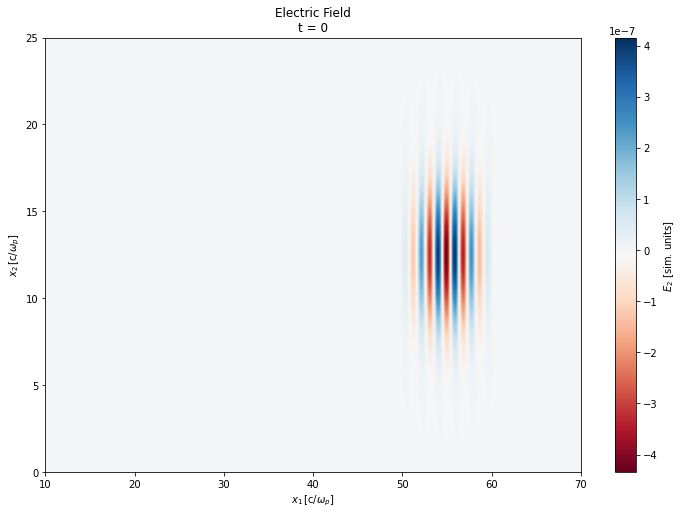

In [7]:
plot_field(1)

In [21]:
def get_correct_file_name(i):
    return f"{i:05d}"

In [26]:
get_correct_file_name(1)

'00001'

In [23]:
max_time = 20
os.mkdir(".temp")
iterations = int(max_time/dt)
for i in range(iterations):
    print(f"{i+1} of {iterations}", end="\r")
    sim.iter()
    if (i) % 15 == 0:
        # j = i // 15
        plot_field(1, get_correct_file_name(i), ".temp", show=False)
        # plot_field(0, f"{i+1}", dir=".temp", show=False)
        # clear_output(wait=True)

In [24]:

images = []
for img in os.listdir(".temp"):
    images.append(imageio.imread(f".temp/{img}"))

imageio.mimsave("Laser_2d.mp4", images)
shutil.rmtree(".temp")

In [25]:
Video("Laser_2d.mp4")